# **Trabajo Practico Final**
Realizado por Pablo Hernan DIAZ

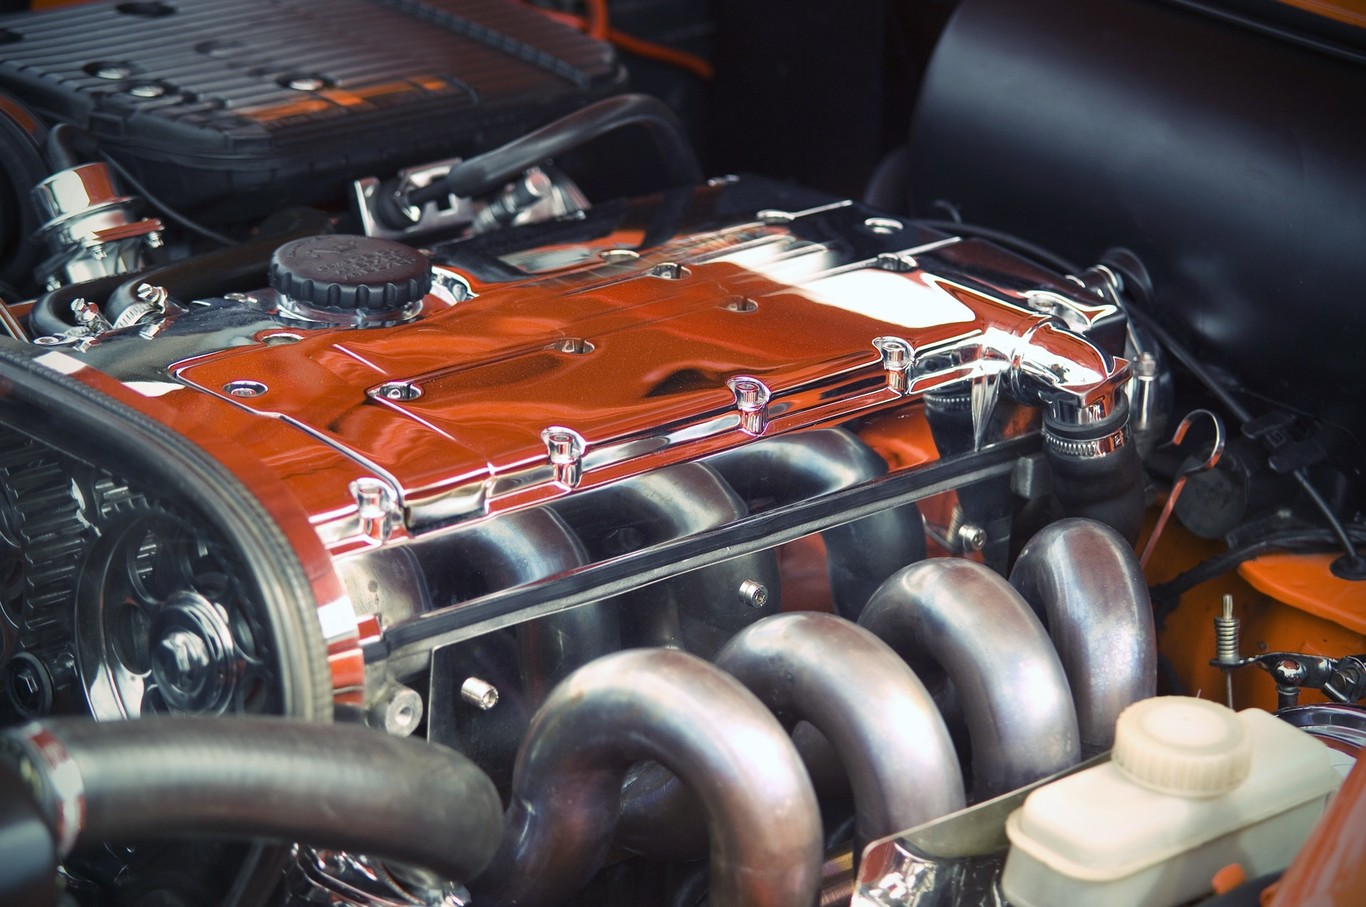

# **Presentación del problema específico.**
Un grupo de concesionarias de automóviles desea predecir los precios minoristas sugeridos (MSRP) de los vehículos nuevos en función de sus características, como el año de fabricación, popularidad, la potencia del motor y la eficiencia de combustible.


**Motivación:**<br> La toma de decisiones en la industria automotriz es fundamental para el éxito de las concesionarias y fabricantes de vehículos. La información precisa y detallada sobre la relación entre las características de los automóviles y su precio minorista sugerido (MSRP) es esencial para la toma de decisiones estratégicas. El análisis de estos datos proporciona insights que pueden mejorar significativamente las operaciones y la rentabilidad de las concesionarias


**Audiencia:**
<br>

Esta presentación está dirigida a las concesionarias de automóviles que desean comprender mejor cómo las características de los vehículos influyen en su valor en el mercado, en especial **la relacion del valor de los vehiculos en funcion a la potencia y el consumo de combustible**. El público objetivo incluye a gerentes, analistas y profesionales de marketing de concesionarias de automóviles que buscan tomar decisiones más informadas sobre la adquisición, precios y estrategias de ventas de vehículos


**¿Que queremos saber?:**
<br>


1.   ¿Cuál es la relación entre las características de los vehículos y sus precios?
2.   ¿Qué características tienen el mayor impacto en el precio de un vehículo?
1.   ¿Cómo se comparan los precios de los vehículos de diferentes marcas?
2.   ¿Cómo ha evolucionado el precio de los vehículos a lo largo del tiempo?

# **Importación de librerías**
---

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np                    # Importar Numpy
import pandas as pd                   # Importar Pandas
import scipy as sp
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from prettytable import PrettyTable

# Gráficos
# ==============================================================================
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt       # El modulo Pyplot de Matplotlib
import seaborn as sns                 # Importar Seaborn
import plotly.express as px
sns.set()
import plotly.graph_objects as go
sns.set_style('whitegrid')    # Establecemos un nuevo estilo


# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

#from sklearn.preprocessing import scale
from sklearn import preprocessing  # Import label encoder
from sklearn.model_selection import train_test_split #para separar en train y test
# Modelos de Clasificacion:
# REGRESCIÓN LOGISTICA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
# ARBOL DEL DECISION
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# XGBOOST
import xgboost

# Métricas
# ==============================================================================
from sklearn.metrics import r2_score
from sklearn import metrics

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# **Adquisición de datos**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.kaggle.com/datasets/CooperUnion/cardataset

---


El conjunto de datos "Car Features and MSRP" es un recurso útil para analizar la relación entre los atributos de los automóviles y su precio minorista sugerido (MSRP).
Fue recopilado por Jeffrey C. Schlimmer del Departamento de Ciencias de la Computación de la Universidad de California, Irvine, y contiene información detallada sobre 10,193 automóviles de diferentes marcas y modelos.
Los datos recopilados son de automoviles producidos entre 1990 y 2017 y han sido ampliamente utilizados en la investigación de aprendizaje automático y la toma de decisiones en el mercado automotriz.
El conjunto de datos consta de 16 columnas que incluyen información sobre el precio, la marca, el modelo, el año, el tipo de cuerpo, la transmisión, la eficiencia de combustible en ciudad y carretera, el tamaño del motor, la potencia y el número de cilindros, entre otras características.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/coder 1 entrega/data.csv')

In [ ]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# Descripcion de columnas:

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

1-Make: Marca del automóvil.<br>
2-Model: Modelo del automóvil.<br>
3-Year: Año de fabricación del automóvil.<br>
4-Engine Fuel Type: Tipo de combustible del motor.<br>
5-Engine HP: Potencia del motor en caballos de fuerza.<br>
6-Engine Cylinders: Número de cilindros en el motor.<br>
7-Transmission Type: Tipo de transmisión del automóvil.<br>
8-Driven_Wheels: Configuración de las ruedas motrices (tracción trasera, <br>delantera o en las cuatro ruedas).<br>
9-Number of Doors: Número de puertas del automóvil.<br>
10-Market Category: Categoría de mercado del automóvil (ejemplo: sedán, SUV, deportivo, etc.).<br>
11-Vehicle Size: Tamaño del vehículo (pequeño, mediano, grande).<br>
12-Vehicle Style: Estilo del vehículo (ejemplo: sedán, coupé, camioneta, etc.).<br>
12-Highway MPG: Consumo de combustible en autopista (millas por galón).<br>
14-City MPG: Consumo de combustible en ciudad (millas por galón).<br>
15-Popularity: Popularidad del automóvil basada en el número de búsquedas en Internet y ventas.<br>
16-MSRP: Precio sugerido de venta al público del automóvil.

# **Data wrangling y Feature Engineering**



# Descartar columnas irrelevantes
Se quitaron las columnas que no afectan en la relación del valor de los vehículos en función a la potencia y el consumo de combustible

In [ ]:
df = df.drop(['Driven_Wheels','Transmission Type','Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,28,18,3916,34500


# Encoding
Transformación de Columnas Categóricas:

Se aplica el Label Encoder a dos columnas categóricas del DataFrame (df):   las columnas "Make" y "Model".

Para la columna "Make", se ajusta y transforma el Label Encoder y se crea una nueva columna llamada "Make_encoded" que contiene las categorías codificadas.

Para la columna "Model", se hace lo mismo y se crea una nueva columna llamada "Model_encoded" que contiene las categorías codificadas.

In [ ]:
# Crear instancias del LabelEncoder para cada columna
label_encoder_make = LabelEncoder()
label_encoder_model = LabelEncoder()

# Ajustar y transformar las columnas categóricas
df['Make_encoded'] = label_encoder_make.fit_transform(df['Make'])
df['Model_encoded'] = label_encoder_model.fit_transform(df['Model'])

# Mostrar el DataFrame con las columnas originales y las codificadas
df

,Make,Model,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP,Make_encoded,Model_encoded
0,BMW,1 Series M,2011,335.0,6.0,26,19,3916,46135,4,1
1,BMW,1 Series,2011,300.0,6.0,28,19,3916,40650,4,0
2,BMW,1 Series,2011,300.0,6.0,28,20,3916,36350,4,0
3,BMW,1 Series,2011,230.0,6.0,28,18,3916,29450,4,0
4,BMW,1 Series,2011,230.0,6.0,28,18,3916,34500,4,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,23,16,204,46120,0,901
11910,Acura,ZDX,2012,300.0,6.0,23,16,204,56670,0,901
11911,Acura,ZDX,2012,300.0,6.0,23,16,204,50620,0,901
11912,Acura,ZDX,2013,300.0,6.0,23,16,204,50920,0,901


# Renombrar columnas


In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price,Make_encoded,Model_encoded
0,BMW,1 Series M,2011,335.0,6.0,26,19,3916,46135,4,1
1,BMW,1 Series,2011,300.0,6.0,28,19,3916,40650,4,0
2,BMW,1 Series,2011,300.0,6.0,28,20,3916,36350,4,0
3,BMW,1 Series,2011,230.0,6.0,28,18,3916,29450,4,0
4,BMW,1 Series,2011,230.0,6.0,28,18,3916,34500,4,0


# Verificar y eliminar las filas duplicadas

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Numero de filas duplicadas: ", duplicate_rows_df.shape)

Numero de filas duplicadas:  (1016, 11)


In [ ]:
df.count()

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
Make_encoded     11914
Model_encoded    11914
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.count()

Make             10898
Model            10898
Year             10898
HP               10829
Cylinders        10868
MPG-H            10898
MPG-C            10898
Popularity       10898
Price            10898
Make_encoded     10898
Model_encoded    10898
dtype: int64

# Verificar y descartar los valores faltantes o nulos

In [ ]:
# Verificar las filas con datos nulos
rows_with_null = df[df.isnull().any(axis=1)]

# Imprimir las filas con datos nulos
print(rows_with_null)

           Make    Model  Year     HP  Cylinders  MPG-H  MPG-C  Popularity  \
539        FIAT     500e  2015    NaN        0.0    108    122         819   
540        FIAT     500e  2016    NaN        0.0    103    121         819   
541        FIAT     500e  2017    NaN        0.0    103    121         819   
1983  Chevrolet  Bolt EV  2017  200.0        NaN    110    128        1385   
1984  Chevrolet  Bolt EV  2017  200.0        NaN    110    128        1385   
...         ...      ...   ...    ...        ...    ...    ...         ...   
9850        Kia  Soul EV  2015    NaN        0.0     92    120        1720   
9851        Kia  Soul EV  2015    NaN        0.0     92    120        1720   
9852        Kia  Soul EV  2016    NaN        0.0     92    120        1720   
9853        Kia  Soul EV  2016    NaN        0.0     92    120        1720   
9854        Kia  Soul EV  2016    NaN        0.0     92    120        1720   

      Price  Make_encoded  Model_encoded  
539   31800         

Los datos nulos en HP y Cylinders se corresponden a vehículos eléctricos, los cuales no tienen motor ni cilindros, como no se evalúa  que energía consumen, se borraran las filas nulas

In [ ]:
df = df.dropna()
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
Make_encoded     0
Model_encoded    0
dtype: int64


# Unión de columnas
Se realiza la unión de las columnas MPG-H  y MPG-C, ya que ambas se refieren al consumo de combustible

In [ ]:
# Calcula el promedio de las columnas MPG-H y MPG-C
df['MPG'] = (df['MPG-H'] + df['MPG-C']) / 2

# Elimina las columnas MPG-H y MPG-C
df.drop(['MPG-H', 'MPG-C'], axis=1, inplace=True)

# Imprime el DataFrame actualizado
print(df)

          Make       Model  Year     HP  Cylinders  Popularity  Price  \
0          BMW  1 Series M  2011  335.0        6.0        3916  46135   
1          BMW    1 Series  2011  300.0        6.0        3916  40650   
2          BMW    1 Series  2011  300.0        6.0        3916  36350   
3          BMW    1 Series  2011  230.0        6.0        3916  29450   
4          BMW    1 Series  2011  230.0        6.0        3916  34500   
...        ...         ...   ...    ...        ...         ...    ...   
11909    Acura         ZDX  2012  300.0        6.0         204  46120   
11910    Acura         ZDX  2012  300.0        6.0         204  56670   
11911    Acura         ZDX  2012  300.0        6.0         204  50620   
11912    Acura         ZDX  2013  300.0        6.0         204  50920   
11913  Lincoln      Zephyr  2006  221.0        6.0          61  28995   

       Make_encoded  Model_encoded   MPG  
0                 4              1  22.5  
1                 4              0  2

# Creacion de variables sintéticas
 Se conservan las variables independientes originales por las siguientes razones:

**Modelado de Aprendizaje Automático:** Algunos algoritmos pueden beneficiarse de tener características originales junto con las derivadas, especialmente si esas características originales son importantes para la predicción.

**Interpretación de Resultados:** Tener las variables originales disponibles puede facilitar la interpretación de los resultados. Comparar cómo se comporta las nuevas variables con las variables originales y obtener una comprensión más completa del fenómeno.

**Validación y Verificación:** Mantener las variables originales  permite verificar la precisión de los cálculos y análisis.

In [ ]:
df['HP_Cylinders_Ratio'] = df['HP'] / df['Cylinders']
df['Price_Popularity_Index'] = df['Price'] / df['Popularity']
df['Price_HP_Ratio'] = df['Price'] / df['HP']
df['Price_MPG_Ratio'] = df['Price'] / df['MPG']
current_year = datetime.now().year
df['Vehicle_Age'] = current_year - df['Year']

print(df)

          Make       Model  Year     HP  Cylinders  Popularity  Price  \
0          BMW  1 Series M  2011  335.0        6.0        3916  46135   
1          BMW    1 Series  2011  300.0        6.0        3916  40650   
2          BMW    1 Series  2011  300.0        6.0        3916  36350   
3          BMW    1 Series  2011  230.0        6.0        3916  29450   
4          BMW    1 Series  2011  230.0        6.0        3916  34500   
...        ...         ...   ...    ...        ...         ...    ...   
11909    Acura         ZDX  2012  300.0        6.0         204  46120   
11910    Acura         ZDX  2012  300.0        6.0         204  56670   
11911    Acura         ZDX  2012  300.0        6.0         204  50620   
11912    Acura         ZDX  2013  300.0        6.0         204  50920   
11913  Lincoln      Zephyr  2006  221.0        6.0          61  28995   

       Make_encoded  Model_encoded   MPG  HP_Cylinders_Ratio  \
0                 4              1  22.5           55.83333

# Detectando  y borrando Outliers

<Axes: xlabel='Year'>

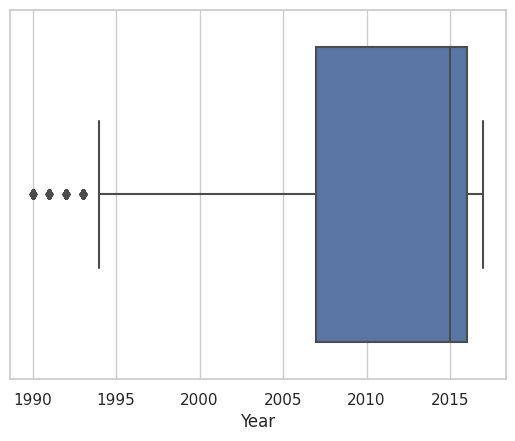

In [ ]:
sns.boxplot(x=df['Year'])

<Axes: xlabel='HP'>

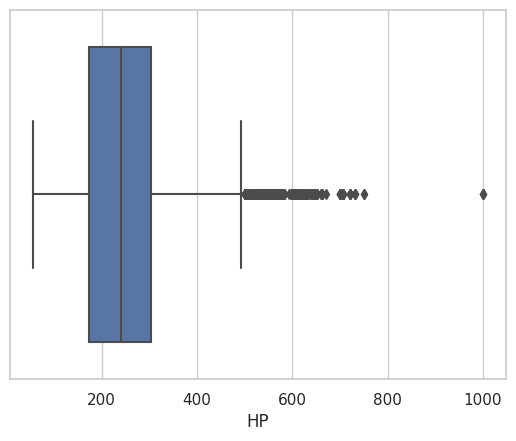

In [ ]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

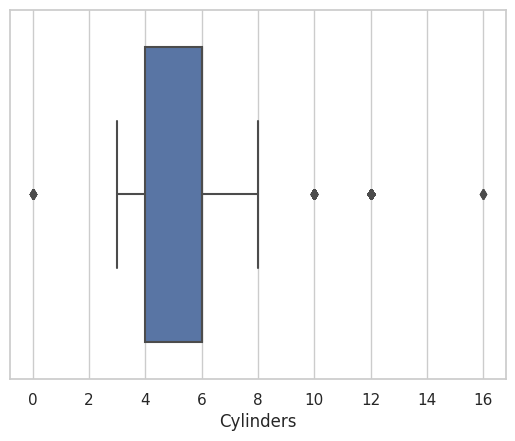

In [ ]:
sns.boxplot(x=df['Cylinders'])

<Axes: xlabel='Popularity'>

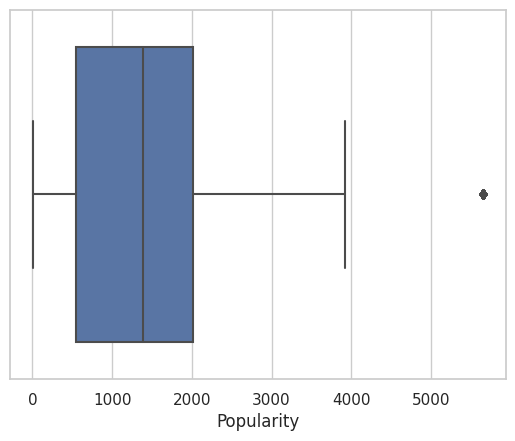

In [ ]:
sns.boxplot(x=df['Popularity'])

<Axes: xlabel='Price'>

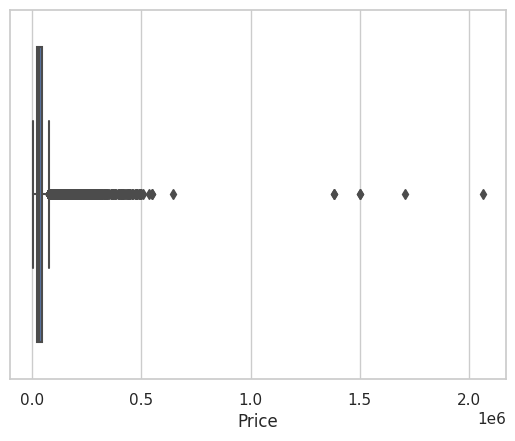

In [ ]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Make_encoded'>

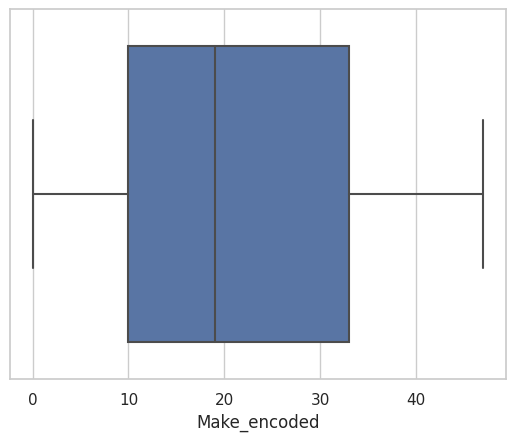

In [ ]:
sns.boxplot(x=df['Make_encoded'])

<Axes: xlabel='Model_encoded'>

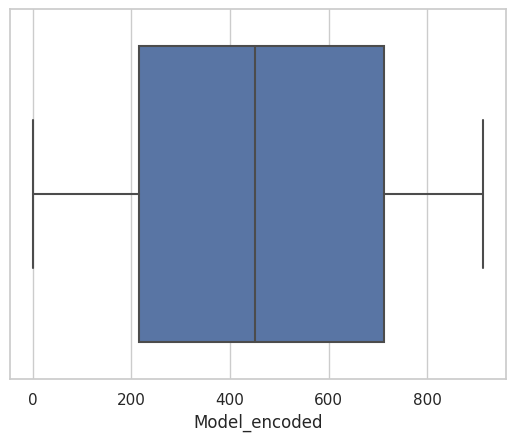

In [ ]:
sns.boxplot(x=df['Model_encoded'])

<Axes: xlabel='MPG'>

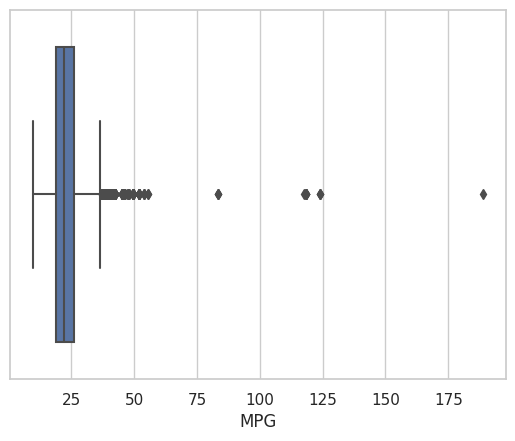

In [ ]:
sns.boxplot(x=df['MPG'])

<Axes: xlabel='HP_Cylinders_Ratio'>

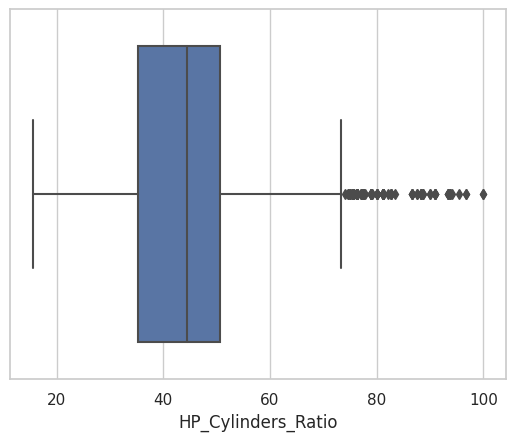

In [ ]:
sns.boxplot(x=df['HP_Cylinders_Ratio'])

<Axes: xlabel='Vehicle_Age'>

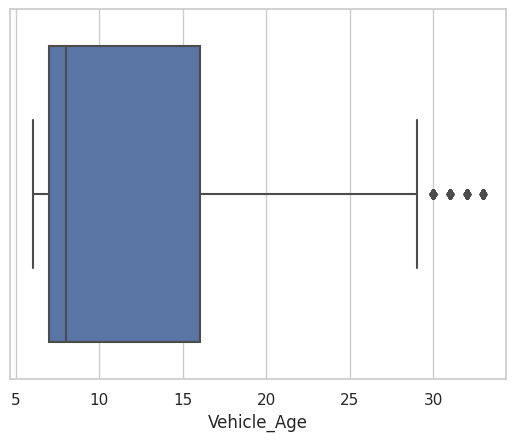

In [ ]:
sns.boxplot(x=df['Vehicle_Age'])

<Axes: xlabel='Price_Popularity_Index'>

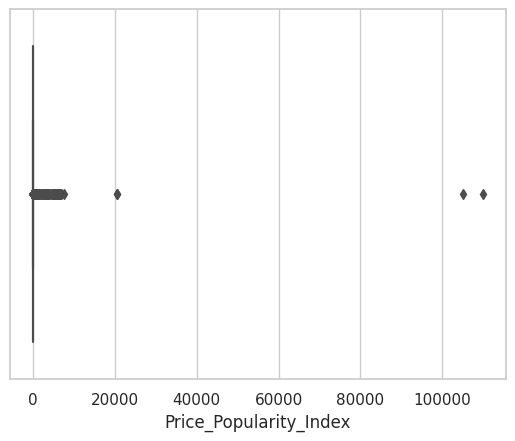

In [ ]:
sns.boxplot(x=df['Price_Popularity_Index'])

<Axes: xlabel='Price_HP_Ratio'>

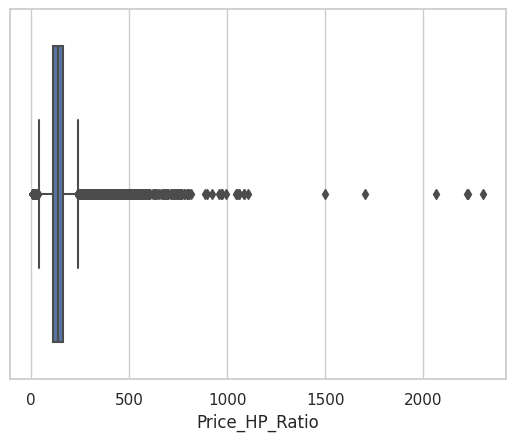

In [ ]:
sns.boxplot(x=df['Price_HP_Ratio'])

<Axes: xlabel='Price_MPG_Ratio'>

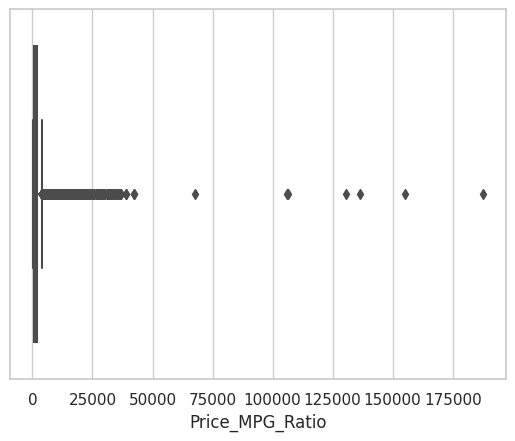

In [ ]:
sns.boxplot(x=df['Price_MPG_Ratio'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                          9.000000
HP                          129.000000
Cylinders                     2.000000
Popularity                 1460.000000
Price                     21305.000000
Make_encoded                 23.000000
Model_encoded               497.250000
MPG                           7.000000
HP_Cylinders_Ratio           15.416667
Price_Popularity_Index       46.709946
Price_HP_Ratio               50.452478
Price_MPG_Ratio            1293.610346
Vehicle_Age                   9.000000
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(6572, 15)

# **Análisis exploratorio de los datos (EDA)**

---

# Resumen Estadístico

In [ ]:
df.describe()



,Year,HP,Cylinders,Popularity,Price,Make_encoded,Model_encoded,MPG,HP_Cylinders_Ratio,Price_Popularity_Index,Price_HP_Ratio,Price_MPG_Ratio,Vehicle_Age
count,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000
mean,2012.759738,234.119598,5.306604,1394.088101,32172.336427,24.342818,467.491175,23.626446,44.127011,32.956774,138.342260,1458.963682,10.240262
std,4.599690,76.608162,1.390622,818.458218,12271.249281,14.836770,283.248933,5.071028,9.130644,24.973143,28.822255,691.582662,4.599690
min,1994.000000,78.000000,3.000000,105.000000,7398.000000,0.000000,0.000000,11.500000,19.750000,5.044313,37.938462,269.536232,6.000000
25%,2010.000000,170.000000,4.000000,617.000000,23115.000000,10.000000,195.000000,19.500000,37.500000,15.076975,118.023763,896.416256,7.000000
50%,2015.000000,223.500000,6.000000,1385.000000,29740.000000,21.000000,461.000000,23.000000,44.375000,24.545126,135.004663,1369.642857,8.000000
75%,2016.000000,285.000000,6.000000,2009.000000,38950.000000,42.000000,747.000000,27.000000,50.000000,41.920103,155.633644,1871.071429,13.000000
max,2017.000000,485.000000,8.000000,3916.000000,75200.000000,47.000000,912.000000,36.500000,73.000000,128.404762,237.500000,4016.666667,29.000000


# Análisis de Distribución

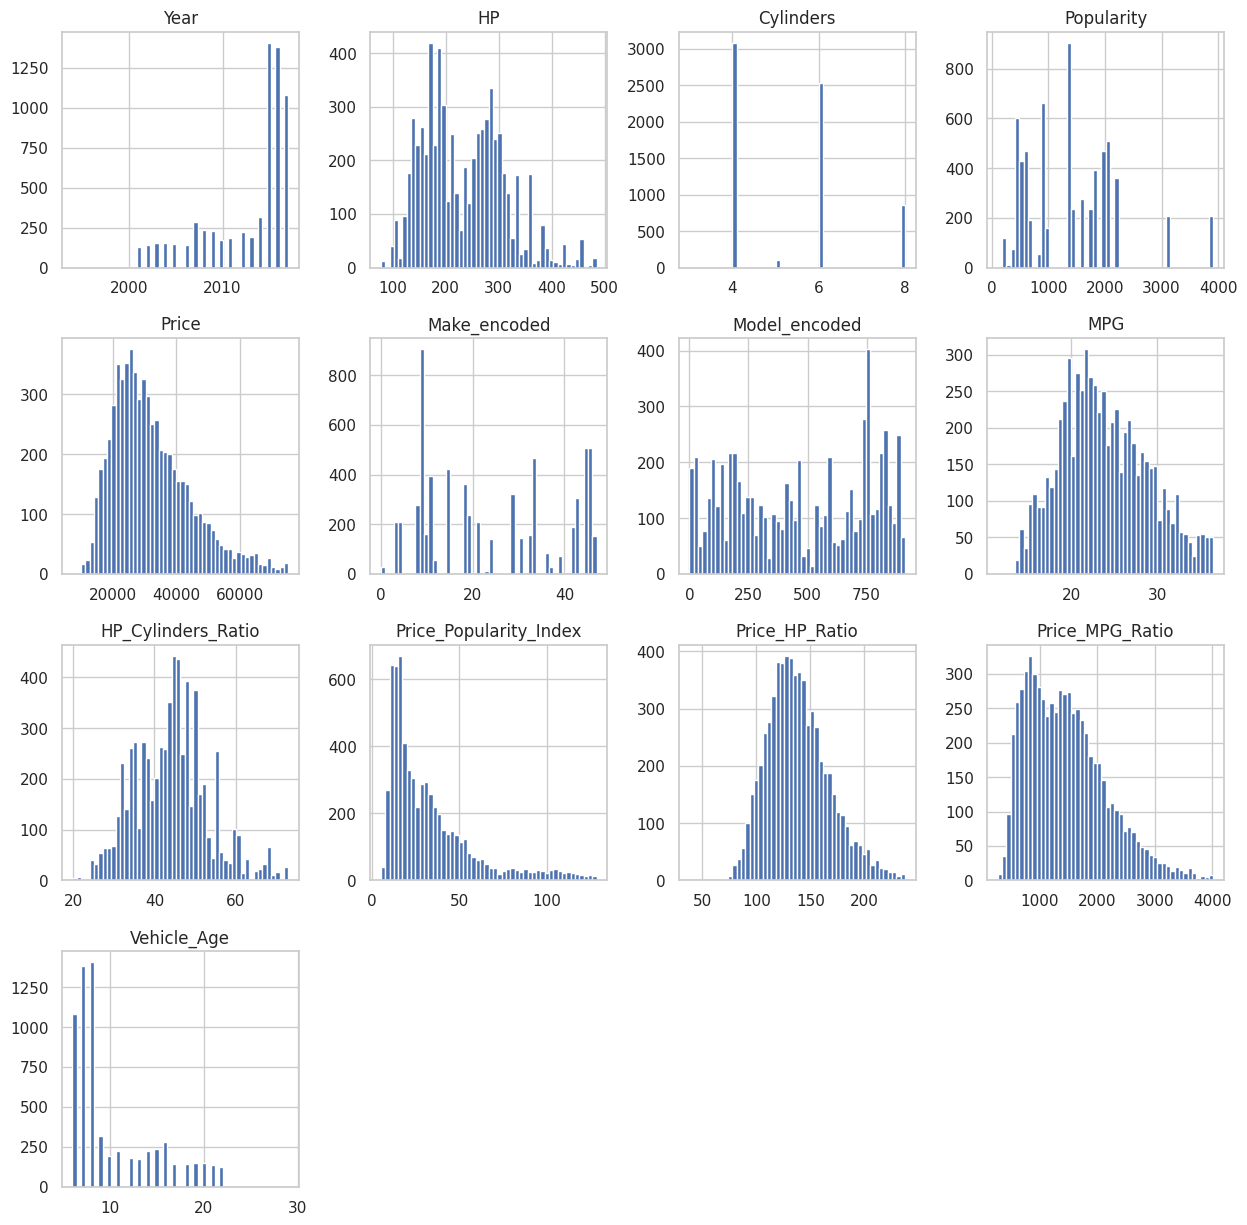

In [ ]:
df.hist(bins = 50, figsize = (15,15));

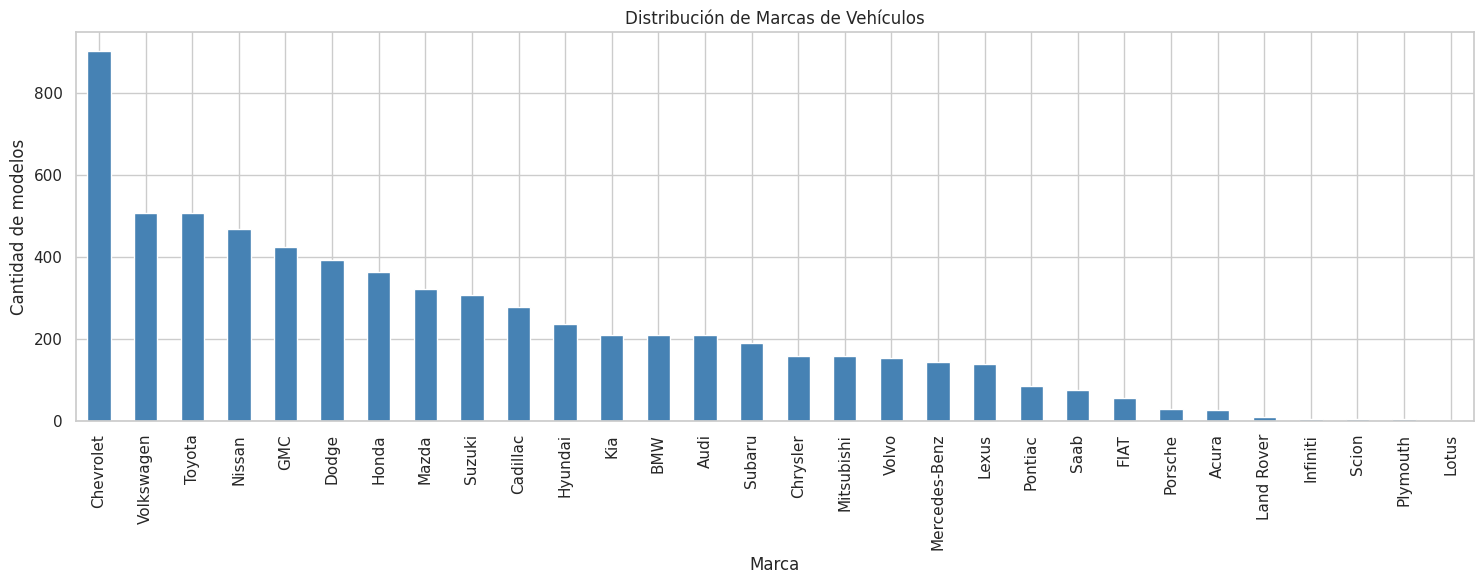

Chevrolet        903
Volkswagen       508
Toyota           507
Nissan           467
GMC              424
Dodge            393
Honda            362
Mazda            321
Suzuki           306
Cadillac         277
Hyundai          237
Kia              209
BMW              209
Audi             209
Subaru           190
Chrysler         159
Mitsubishi       157
Volvo            153
Mercedes-Benz    144
Lexus            139
Pontiac           86
Saab              74
FIAT              56
Porsche           28
Acura             27
Land Rover        10
Infiniti           5
Scion              5
Plymouth           4
Lotus              3
Name: Make, dtype: int64

In [ ]:
# Calcular la frecuencia de cada categoría en la columna 'Brand'
category_counts = df['Make'].value_counts()

# Crear un gráfico de barras para visualizar la distribución de categorías
plt.figure(figsize=(15, 6))
category_counts.plot(kind='bar', color='steelblue')
plt.title('Distribución de Marcas de Vehículos')
plt.xlabel('Marca')
plt.ylabel('Cantidad de modelos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
category_counts


El modelo de automóvil que mas versiones posee: Silverado 1500


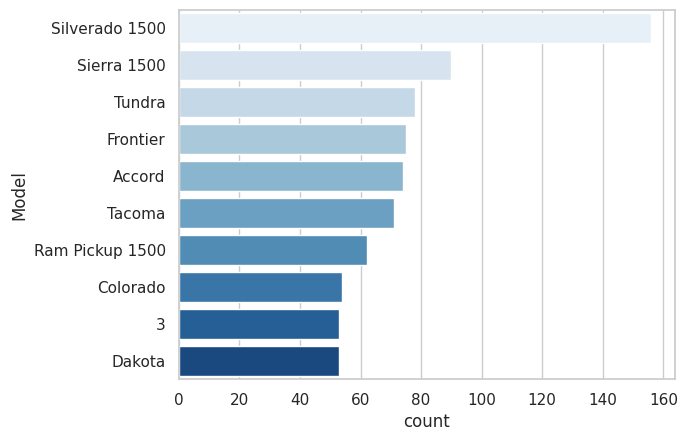

In [ ]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Gráfico de barras de los modelos de automóviles que aparecen con más frecuencia
sns.countplot(y="Model", data=df, order=df['Model'].value_counts().index[:10], palette="Blues")

# Cálculo de la moda para el modelo de automóvil más frecuente
modelo_de_auto_mas_comun = df['Model'].mode()[0]
print("El modelo de automóvil que mas versiones posee:", modelo_de_auto_mas_comun)

# Muestra el gráfico
plt.show()

# Análisis de Correlación

,Year,HP,Cylinders,Popularity,Price,Make_encoded,Model_encoded,MPG,HP_Cylinders_Ratio,Price_Popularity_Index,Price_HP_Ratio,Price_MPG_Ratio,Vehicle_Age
Year,1.000000,0.252219,-0.093047,0.257984,0.334238,0.003116,-0.085508,0.339677,0.495283,-0.115679,0.243287,0.134516,-1.000000
HP,0.252219,1.000000,0.794904,0.208713,0.798622,-0.256626,0.055727,-0.583767,0.584957,0.186190,-0.097975,0.866170,-0.252219
Cylinders,-0.093047,0.794904,1.000000,0.078774,0.533924,-0.243480,0.209579,-0.746026,-0.003542,0.171237,-0.244493,0.764080,0.093047
Popularity,0.257984,0.208713,0.078774,1.000000,0.255976,-0.374487,-0.077949,0.043309,0.223421,-0.673912,0.135198,0.175137,-0.257984
Price,0.334238,0.798622,0.533924,0.255976,1.000000,-0.239939,-0.013873,-0.329535,0.603571,0.308310,0.494476,0.904451,-0.334238
Make_encoded,0.003116,-0.256626,-0.243480,-0.374487,-0.239939,1.000000,0.067509,0.165129,-0.109309,0.173239,-0.016121,-0.249586,-0.003116
Model_encoded,-0.085508,0.055727,0.209579,-0.077949,-0.013873,0.067509,1.000000,-0.273131,-0.172787,0.031539,-0.104617,0.117576,0.085508
MPG,0.339677,-0.583767,-0.746026,0.043309,-0.329535,0.165129,-0.273131,1.000000,-0.036370,-0.182194,0.301559,-0.655294,-0.339677
HP_Cylinders_Ratio,0.495283,0.584957,-0.003542,0.223421,0.603571,-0.109309,-0.172787,-0.036370,1.000000,0.106362,0.164196,0.425433,-0.495283
Price_Popularity_Index,-0.115679,0.186190,0.171237,-0.673912,0.308310,0.173239,0.031539,-0.182194,0.106362,1.000000,0.223137,0.306502,0.115679


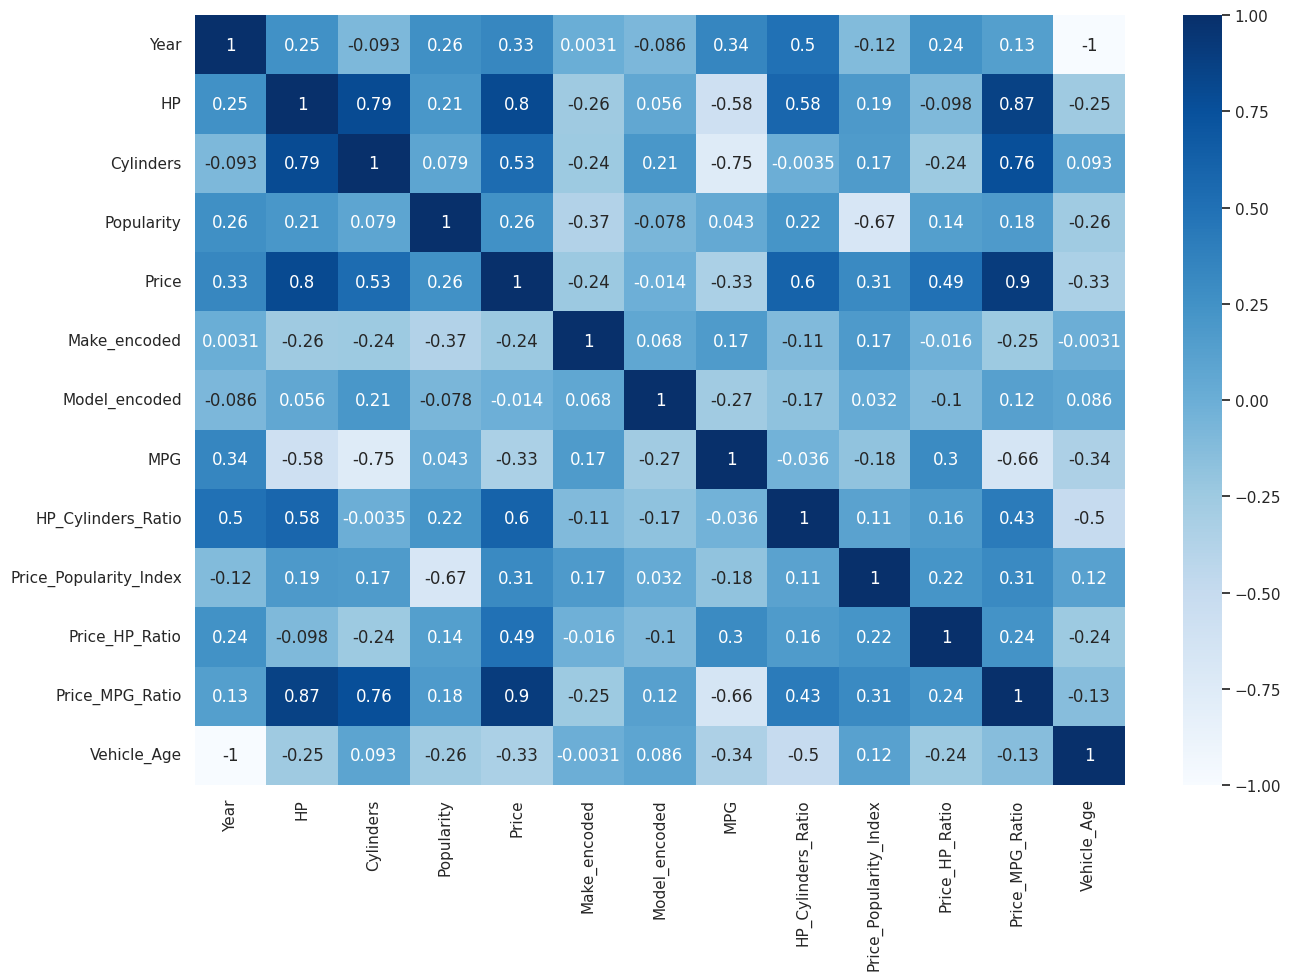

In [ ]:
plt.figure(figsize=(15,10))
c= df.corr()
sns.heatmap(c,cmap="Blues",annot=True)
c

Se observa que el feature "Price" depende principalmente los features "HP", "Year" y "Cylinders".

# ¿Cuál es la relación entre las características de los vehículos y sus precios?

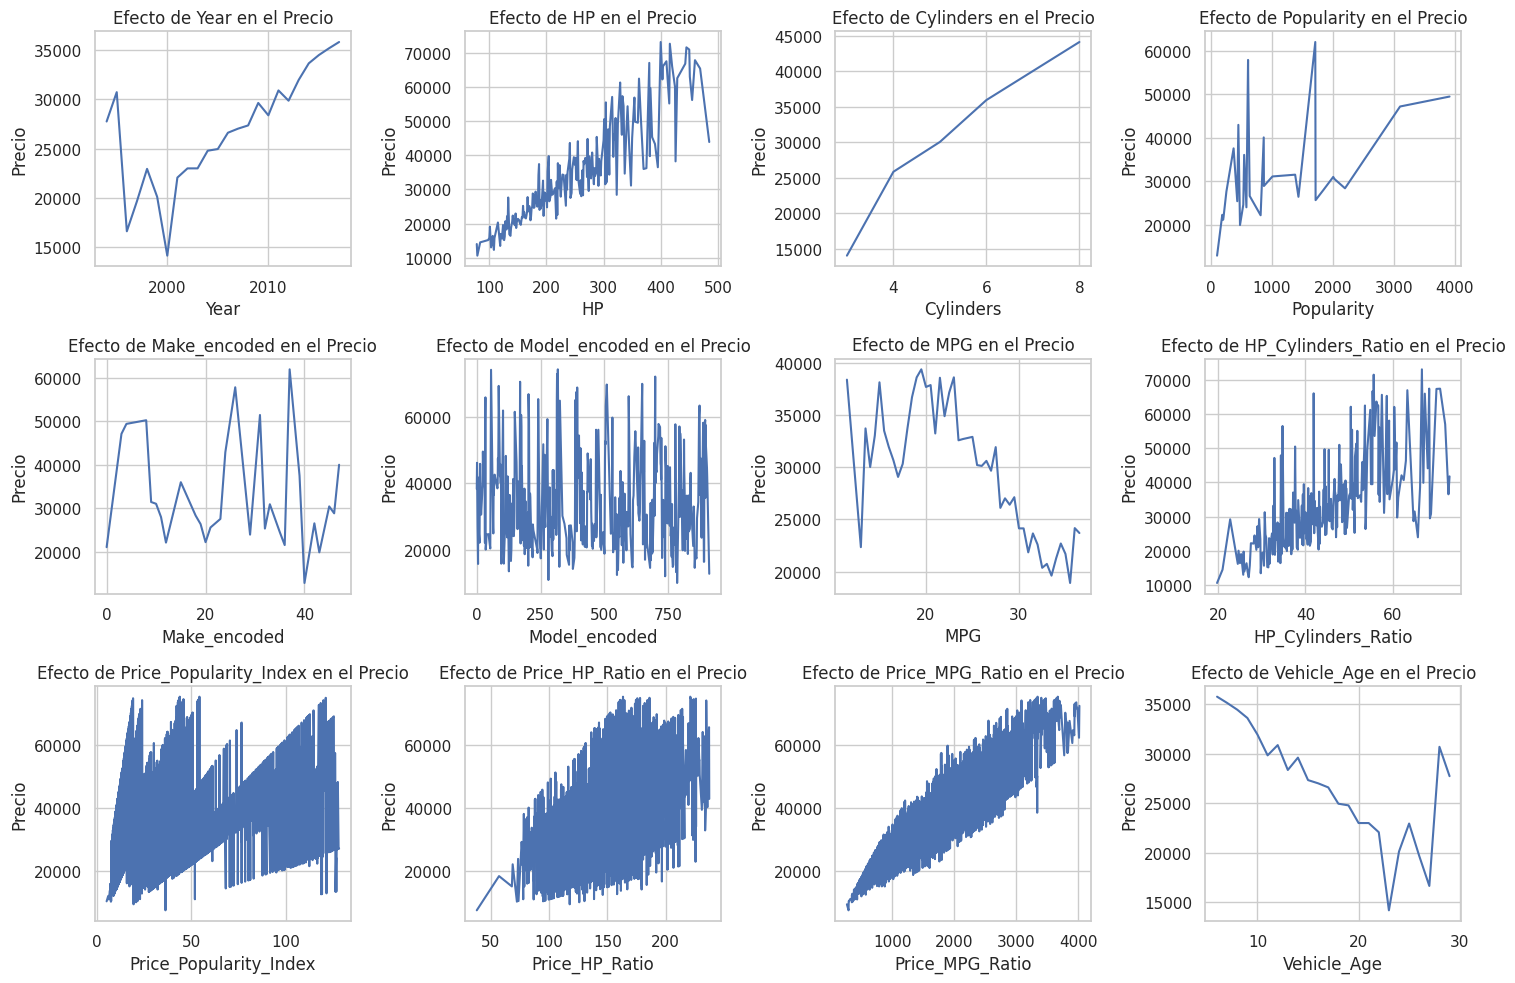

In [ ]:
# Lista de características
features = ["Year", "HP", "Cylinders", "Popularity", "Make_encoded",
            "Model_encoded", "MPG", "HP_Cylinders_Ratio", "Price_Popularity_Index",
            "Price_HP_Ratio", "Price_MPG_Ratio", "Vehicle_Age"]

# Crear subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

for i, feature in enumerate(features):
    row, col = i // 4, i % 4
    sns.lineplot(data=df, x=feature, y="Price", ax=axes[row, col], ci=None, palette="coolwarm")
    axes[row, col].set_title(f"Efecto de {feature} en el Precio")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Precio")

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

# ¿Qué características tienen el mayor impacto en el precio de un vehículo?

In [ ]:
# Lista de todas las características
all_features = ["Year", "HP", "Cylinders", "Popularity","MPG"]

# Seleccionar el conjunto de datos de características (X) y el conjunto de datos de destino (y)
X = df[all_features]
y = df['Price']

# Crear y entrenar el modelo de árbol de decisiones
model = DecisionTreeRegressor()
model.fit(X, y)

# Obtener la importancia de las características
feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': model.feature_importances_})

# Ordenar las características por importancia en orden descendente
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Mostrar el impacto relativo de las características en el precio
print(feature_importance)


      Feature  Importance
1          HP    0.773802
3  Popularity    0.119331
4         MPG    0.066243
0        Year    0.026885
2   Cylinders    0.013740


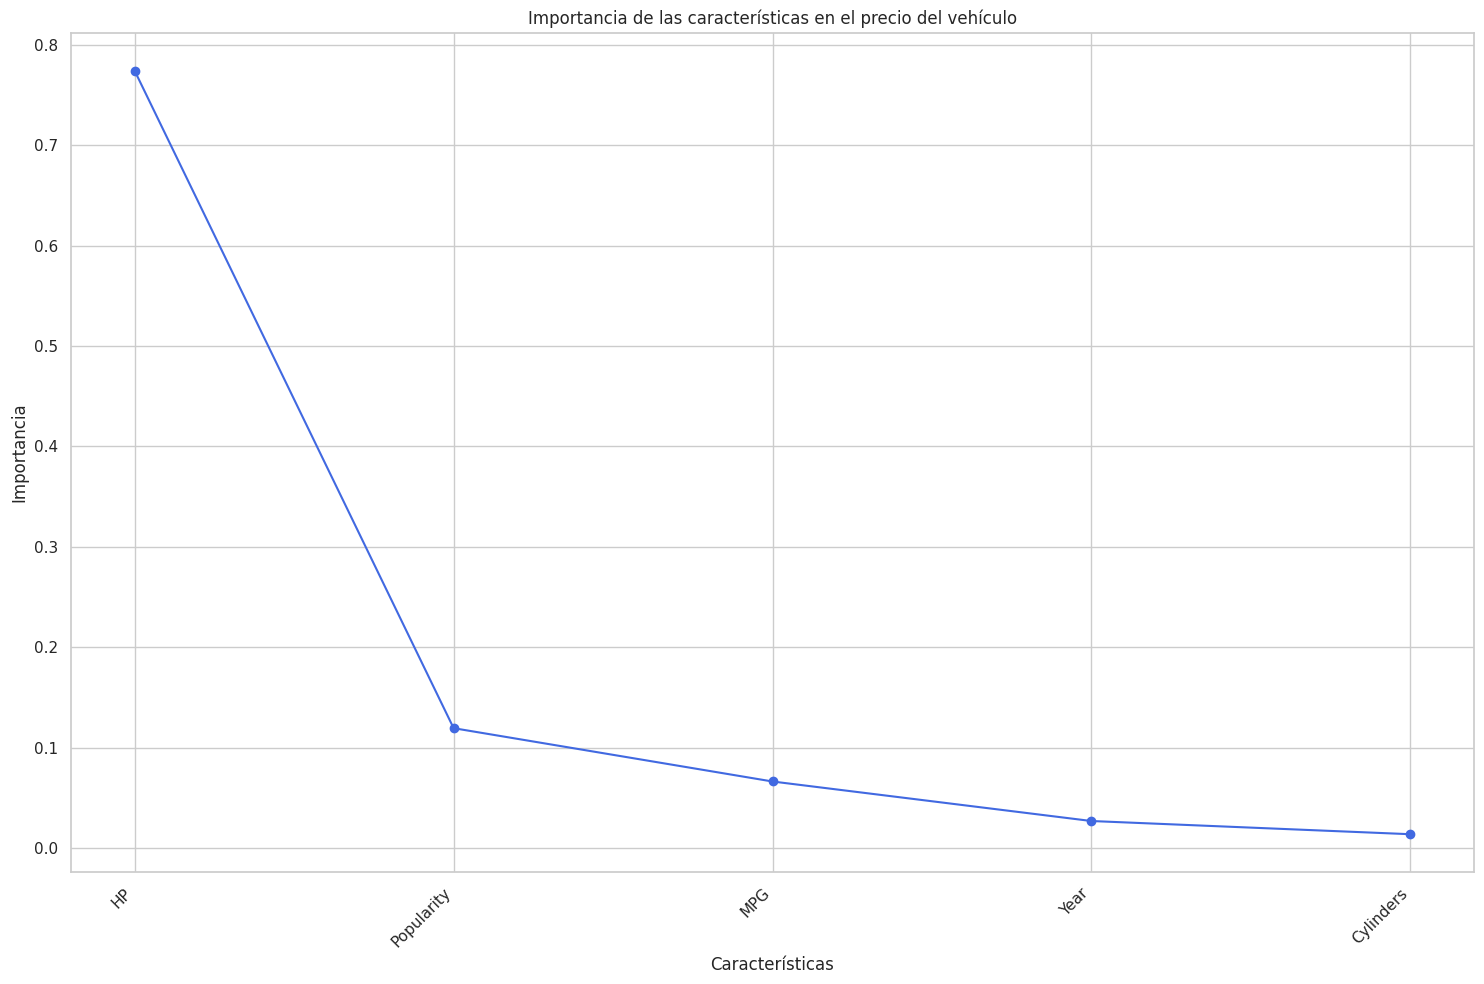

In [ ]:
# Crear el gráfico de líneas
plt.figure(figsize=(15, 10))
plt.plot(feature_importance['Feature'], feature_importance['Importance'], marker='o', linestyle='-', color='royalblue')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características en el precio del vehículo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# ¿Cómo se comparan los precios de los vehículos de diferentes marcas?

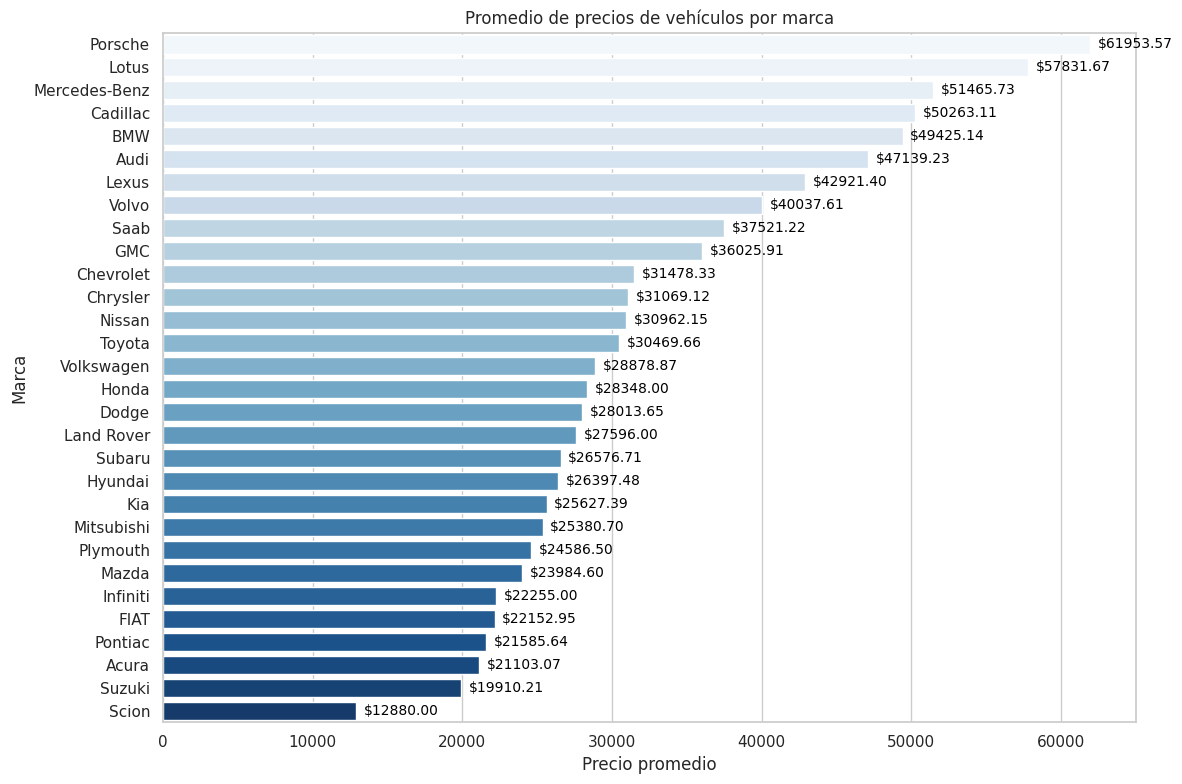

In [ ]:
# Calcular el promedio de los precios por marca
average_prices = df.groupby('Make')['Price'].mean().reset_index()

# Ordenar las marcas por el promedio de precios de forma descendente
average_prices = average_prices.sort_values(by='Price', ascending=False)

# Configurar el estilo y paleta de Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("Blues", n_colors=len(average_prices))

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Make', data=average_prices, palette=palette)
plt.xlabel('Precio promedio')
plt.ylabel('Marca')
plt.title('Promedio de precios de vehículos por marca')

# Añadir etiquetas de valor en las barras
for index, value in enumerate(average_prices['Price']):
    plt.text(value + 500, index, f'${value:.2f}', va='center', color='black', fontsize=10)

# Ajustar espacios y margenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

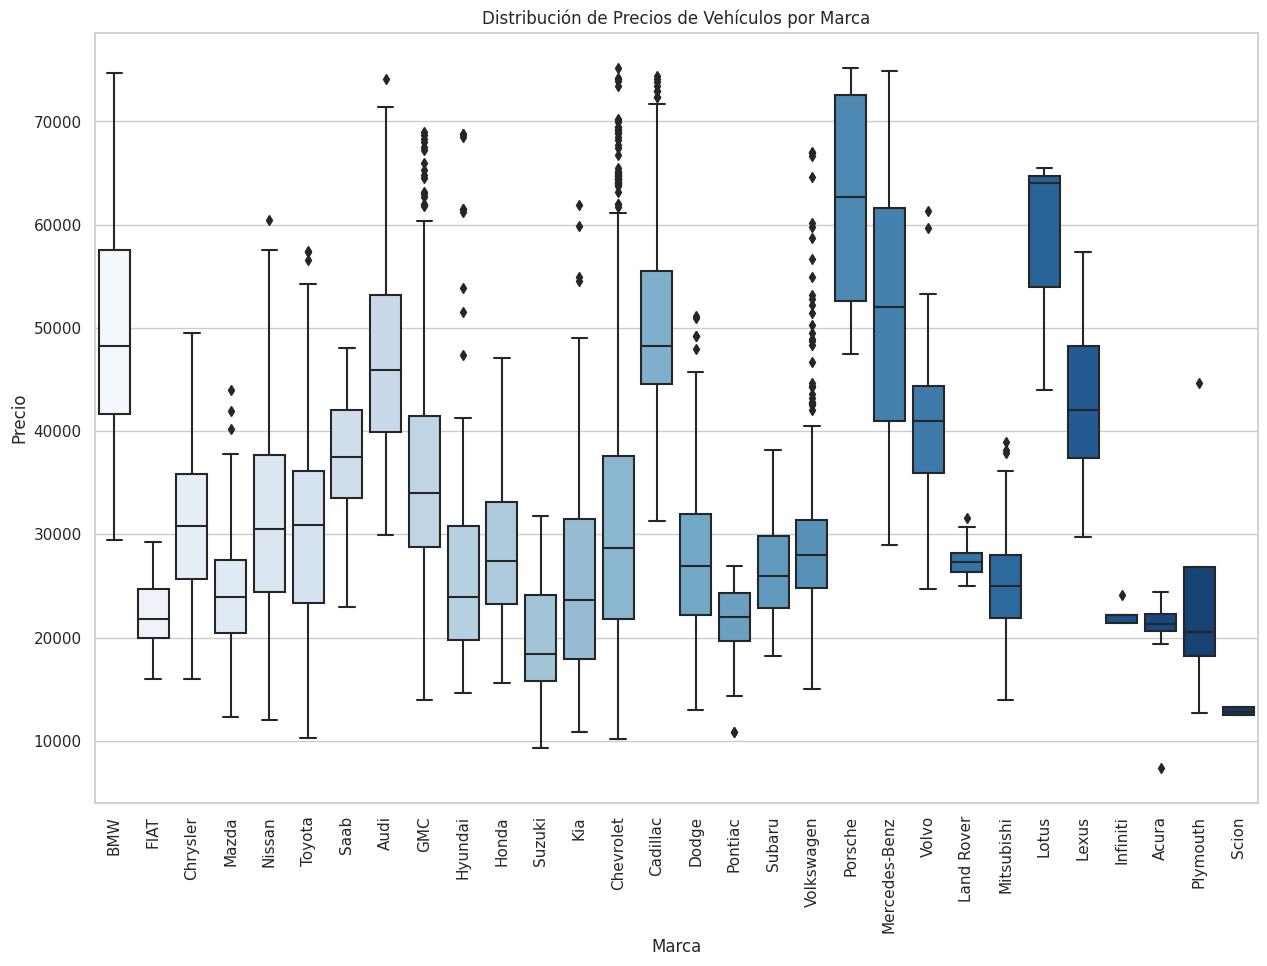

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="Make", y="Price", palette="Blues")
plt.xticks(rotation=90)
plt.xlabel("Marca")
plt.ylabel("Precio")
plt.title("Distribución de Precios de Vehículos por Marca")
plt.show()


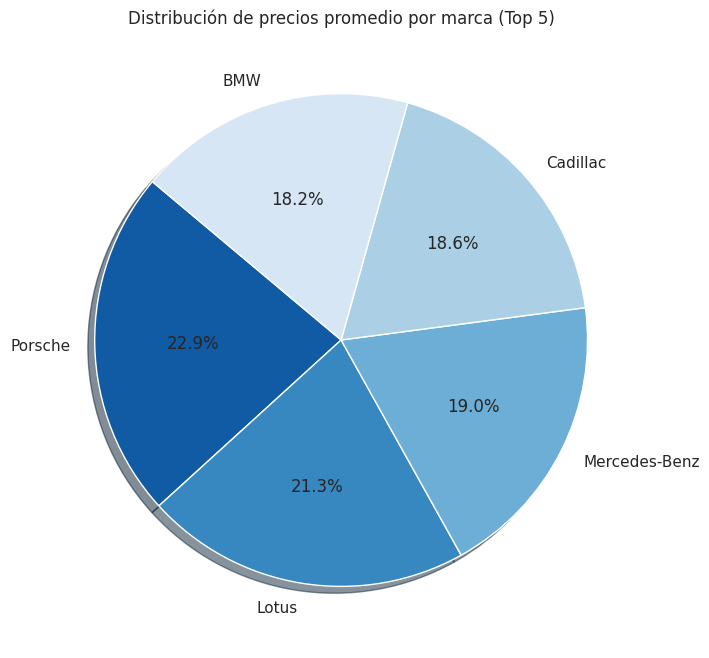

In [ ]:
# Calcular el promedio de los precios por marca
average_prices = df.groupby('Make')['Price'].mean().reset_index()

# Ordenar las marcas por el promedio de precios de forma descendente
average_prices = average_prices.sort_values(by='Price', ascending=False)

# Tomar las cinco marcas con el precio promedio más alto
top_5_brands = average_prices.head(5)

# Configurar el estilo y paleta de Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("Blues_r", n_colors=len(top_5_brands))

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(top_5_brands['Price'], labels=top_5_brands['Make'], colors=palette, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribución de precios promedio por marca (Top 5)')

# Mostrar el gráfico
plt.show()

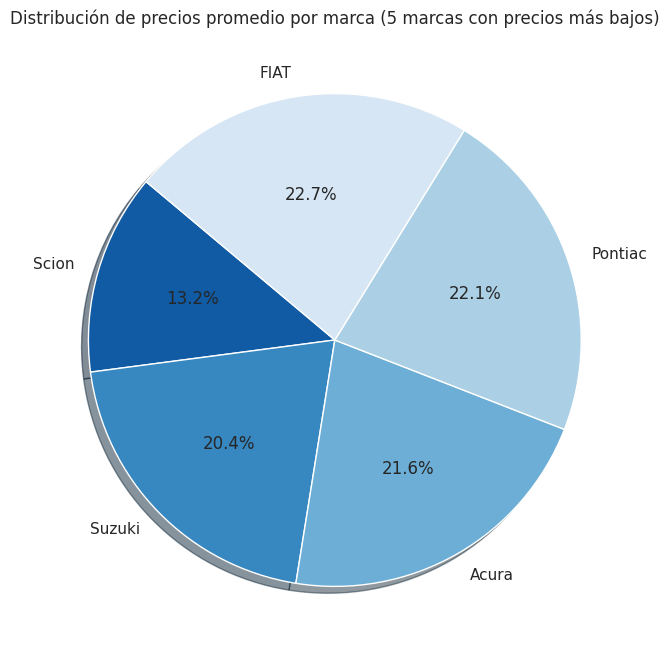

In [ ]:
# Calcular el precio promedio por marca
avg_price_by_make = df.groupby('Make')['Price'].mean()

# Ordenar por precio promedio y tomar las 5 marcas con los precios más bajos
avg_price_by_make = avg_price_by_make.sort_values().head(5)

# Configurar el estilo y paleta de Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("Blues_r", n_colors=len(avg_price_by_make))

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(avg_price_by_make, labels=avg_price_by_make.index, colors=palette, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribución de precios promedio por marca (5 marcas con precios más bajos)')

# Mostrar el gráfico
plt.show()

In [ ]:
# Calcular el precio promedio por marca
avg_price_by_make = df.groupby('Make')['Price'].mean()

# Ordenar las marcas por precio promedio de forma ascendente
sorted_avg_prices = avg_price_by_make.sort_values(ascending=True)

# Filtrar el DataFrame original por las marcas seleccionadas
filtered_cars = df[df['Make'].isin(sorted_avg_prices.index)]

# Contar la cantidad de vehículos por marca
vehicle_counts = filtered_cars['Make'].value_counts()

# Mostrar la cantidad de vehículos por marca ordenadas por precio promedio
sorted_vehicle_counts = vehicle_counts.reindex(sorted_avg_prices.index)

print(sorted_vehicle_counts)

Make
Scion              5
Suzuki           306
Acura             27
Pontiac           86
FIAT              56
Infiniti           5
Mazda            321
Plymouth           4
Mitsubishi       157
Kia              209
Hyundai          237
Subaru           190
Land Rover        10
Dodge            393
Honda            362
Volkswagen       508
Toyota           507
Nissan           467
Chrysler         159
Chevrolet        903
GMC              424
Saab              74
Volvo            153
Lexus            139
Audi             209
BMW              209
Cadillac         277
Mercedes-Benz    144
Lotus              3
Porsche           28
Name: Make, dtype: int64


# ¿Cómo ha evolucionado el precio de los vehículos a lo largo del tiempo?

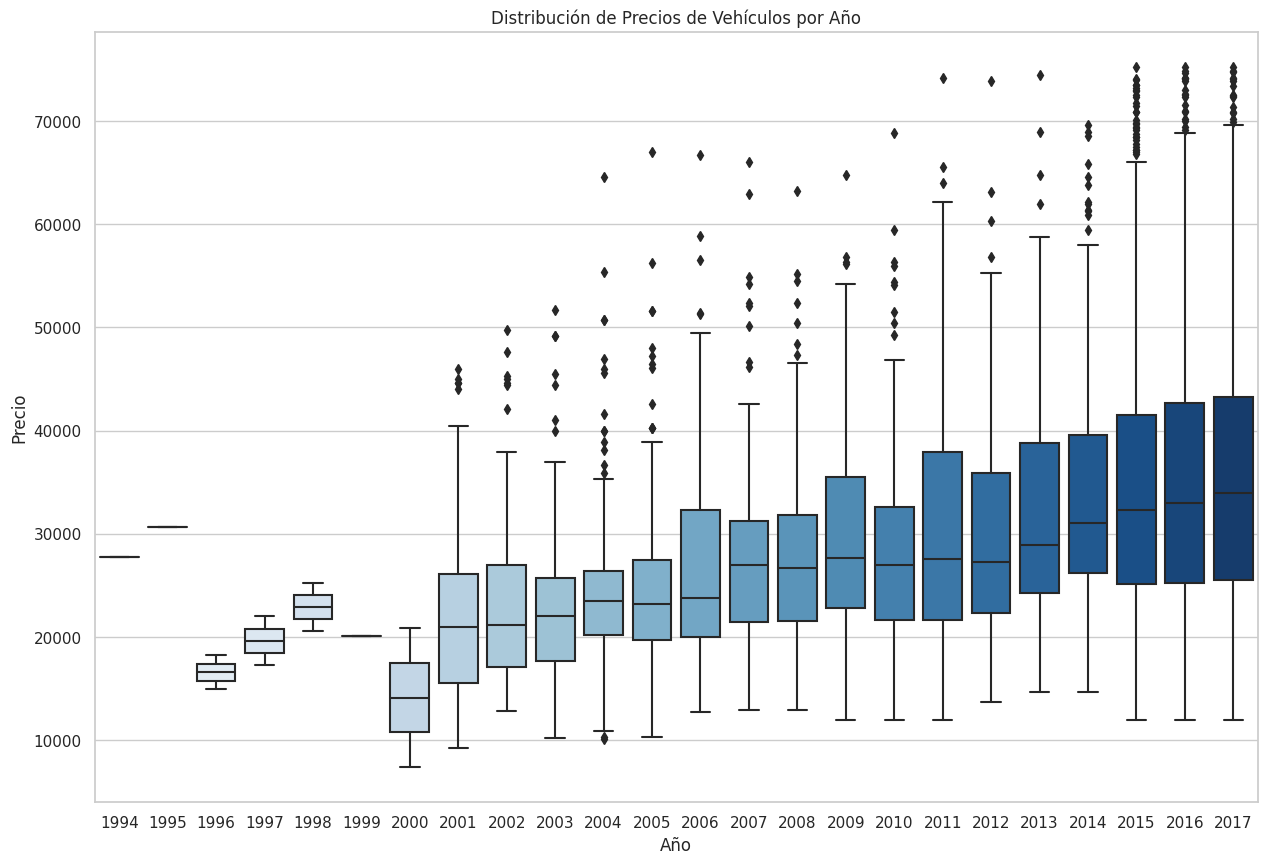

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="Year", y="Price", palette="Blues")
plt.xlabel("Año")
plt.ylabel("Precio")
plt.title("Distribución de Precios de Vehículos por Año")
plt.show()

In [ ]:
# Promedio de Precio recomendado de venta al público por año de todas las empresas productoras
promedios = df.groupby('Year')['Price'].mean()
promedios

Year
1994    27736.000000
1995    30709.000000
1996    16616.000000
1997    19660.500000
1998    22937.500000
1999    20105.000000
2000    14149.500000
2001    22055.346457
2002    22986.702899
2003    22988.384106
2004    24776.828947
2005    24947.075862
2006    26598.194444
2007    27011.257951
2008    27337.924051
2009    29613.427313
2010    28362.217143
2011    30882.362637
2012    29845.026667
2013    31943.649485
2014    33628.063492
2015    34467.106762
2016    35150.973227
2017    35786.714551
Name: Price, dtype: float64

# **Resumen de la exploracion:**

# ¿Cuál es la relación entre las características de los vehículos y sus precios?


*   Los vehículos más potentes (mayor HP) son los de mayor valor
*   El valor de los vehículos tiende a subir cuanto más cilindros tenga
*   Los vehículos de mayor valor son los que menos rendimiento de combustible tienen





# ¿Qué características tienen el mayor impacto en el precio de un vehículo?
<br>
Se realizó un modelo de árbol de decisiones en la cual se observó las características que tiene mayor impacto en el precio son "HP" y "Popularity", siendo "HP" la de mayor impacto

# ¿Cómo se comparan los precios de los vehículos de diferentes marcas?
<br>
Se muestra las marcas ordenadas por sus precios promedio, cuáles son las marcas 5 más baratas y más caras, y que cantidad de modelos fabricaron a lo largo de los años las marcas.<br>
Se puede tomar como conclusión que las marcas con mayor producción son las de valores promedio que se encuentran de mitad de tabla hacía bajo en relación a los valores

# ¿Cómo ha evolucionado el precio de los vehículos a lo largo del tiempo?
<br>
Los valores se mantuvieron estables desde 1994 hasta el 2000, en el año 2001 se septuplico el valor promedio de los vehículos, estabilizándose otra vez en los últimos 4 años.<br> Así mismo, el valor de los vehículos tiende a subir según pasan los años

# **Análisis de componentes principales.**


# Descartar columnas irrelevantes

In [ ]:
df = df.drop(['Make','Model'], axis=1)
df.head(5)

,Year,HP,Cylinders,Popularity,Price,Make_encoded,Model_encoded,MPG,HP_Cylinders_Ratio,Price_Popularity_Index,Price_HP_Ratio,Price_MPG_Ratio,Vehicle_Age
0,2011,335.0,6.0,3916,46135,4,1,22.5,55.833333,11.781154,137.716418,2050.444444,12
1,2011,300.0,6.0,3916,40650,4,0,23.5,50.000000,10.380490,135.500000,1729.787234,12
2,2011,300.0,6.0,3916,36350,4,0,24.0,50.000000,9.282431,121.166667,1514.583333,12
3,2011,230.0,6.0,3916,29450,4,0,23.0,38.333333,7.520429,128.043478,1280.434783,12
4,2011,230.0,6.0,3916,34500,4,0,23.0,38.333333,8.810010,150.000000,1500.000000,12


## Entrenamiento modelo PCA con escalado de los datos

In [ ]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
pca_pipe.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']
)

,Year,HP,Cylinders,Popularity,Price,Make_encoded,Model_encoded,MPG,HP_Cylinders_Ratio,Price_Popularity_Index,Price_HP_Ratio,Price_MPG_Ratio,Vehicle_Age
PC1,0.163202,4.529010e-01,3.487528e-01,0.133557,4.423009e-01,-1.572957e-01,3.422485e-02,-2.668695e-01,2.880342e-01,1.090463e-01,8.574566e-02,4.551646e-01,-0.163202
PC2,-0.476530,6.870451e-02,3.087105e-01,-0.229977,-8.418149e-02,-4.356844e-03,1.904898e-01,-4.091188e-01,-2.709532e-01,1.693687e-01,-2.605250e-01,1.103725e-01,0.476530
PC3,0.042162,-4.835322e-02,-1.236585e-01,-0.552316,1.393838e-01,3.782786e-01,-1.885228e-02,9.578538e-02,9.221471e-02,6.322337e-01,2.995483e-01,6.129642e-02,-0.042162
PC4,-0.348150,-1.525841e-01,-1.343144e-01,0.198037,2.157340e-01,-3.839631e-01,-3.823786e-01,9.577764e-02,-5.646137e-02,7.281600e-02,5.556008e-01,1.024916e-01,0.348150
PC5,0.046805,-1.779589e-01,8.543598e-03,0.171764,1.040198e-01,6.521509e-02,7.770106e-01,2.292527e-02,-3.124840e-01,-8.637053e-02,4.477614e-01,9.712116e-02,-0.046805
PC6,-0.185921,4.800316e-02,-3.028235e-02,0.314829,1.063996e-01,8.106323e-01,-1.719144e-01,-1.103027e-01,1.267998e-01,-2.803634e-01,1.100200e-01,1.075872e-01,0.185921
PC7,-0.222514,3.269580e-02,-4.376005e-01,0.024884,-9.181888e-04,-1.306924e-01,4.040306e-01,-5.246132e-02,7.117251e-01,1.946297e-02,-1.017038e-01,-8.627594e-02,0.222514
PC8,0.178495,-2.973132e-01,-2.785892e-01,-0.159720,-1.718772e-01,-6.147268e-02,-1.388733e-01,-7.842810e-01,1.546835e-02,-1.577413e-01,1.964383e-01,1.155377e-01,-0.178495
PC9,0.069685,-1.197551e-01,-5.173954e-02,0.655404,-1.692381e-01,4.911126e-02,-1.062534e-02,-1.887887e-01,-5.612432e-02,6.650719e-01,-1.394578e-01,-1.094926e-01,-0.069685
PC10,0.003823,-2.092879e-01,-4.458982e-01,0.016731,2.037959e-01,-3.148213e-03,-5.329334e-03,1.762836e-01,-2.277639e-01,1.310541e-02,-4.300614e-01,6.688918e-01,-0.003823


In [ ]:
numero_de_componentes = modelo_pca.n_components_
print("Número de componentes principales retenidos:", numero_de_componentes)


Número de componentes principales retenidos: 13


In [ ]:
np.arange(len(df.columns)) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
# Obtener la proporción de la varianza explicada por cada uno de los componentes principales
modelo_pca.explained_variance_ratio_

array([3.33960031e-01, 2.27529444e-01, 1.39968880e-01, 9.33477640e-02,
       7.52423604e-02, 5.12632060e-02, 4.45332371e-02, 1.88725678e-02,
       1.10863722e-02, 2.66038577e-03, 9.34192393e-04, 6.01559992e-04,
       9.98806801e-32])

Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.33960031e-01 2.27529444e-01 1.39968880e-01 9.33477640e-02
 7.52423604e-02 5.12632060e-02 4.45332371e-02 1.88725678e-02
 1.10863722e-02 2.66038577e-03 9.34192393e-04 6.01559992e-04
 9.98806801e-32]


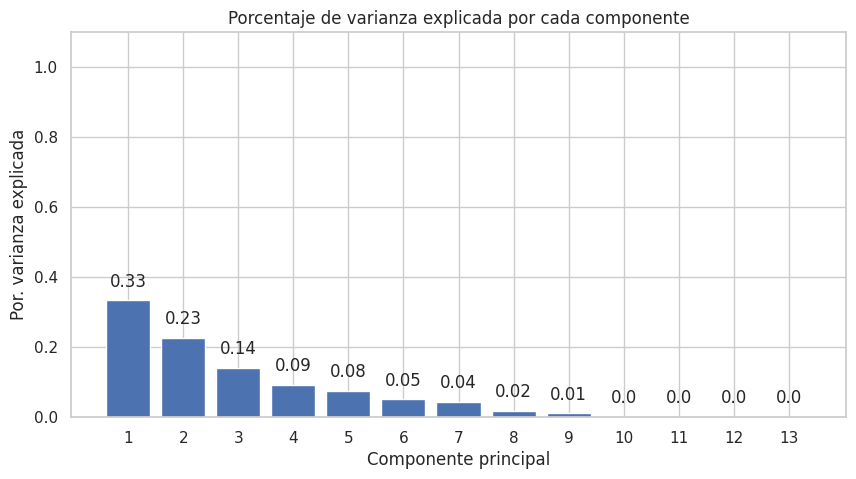

In [ ]:
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente:')
print(modelo_pca.explained_variance_ratio_)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
#Varianza acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.33396003, 0.56148947, 0.70145835, 0.79480612, 0.87004848,
       0.92131168, 0.96584492, 0.98471749, 0.99580386, 0.99846425,
       0.99939844, 1.        , 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.33396003 0.56148947 0.70145835 0.79480612 0.87004848 0.92131168
 0.96584492 0.98471749 0.99580386 0.99846425 0.99939844 1.
 1.        ]


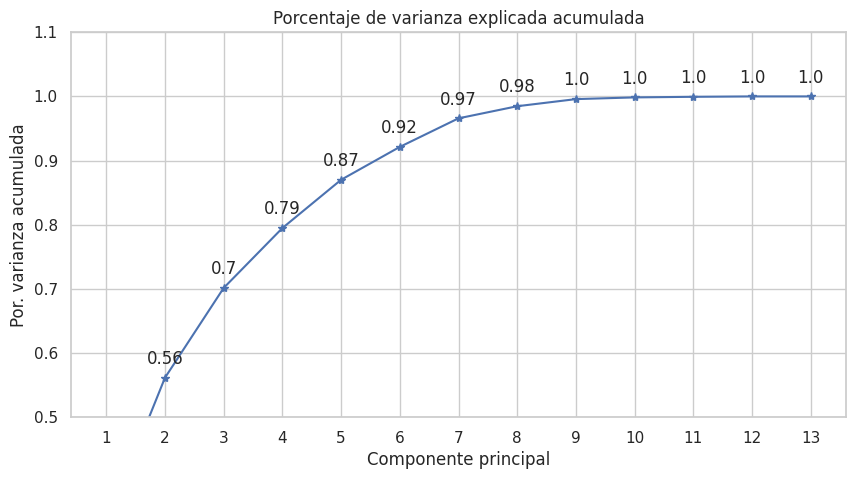

In [ ]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada:')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = '*'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0.5, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [ ]:
# Proyección de las observaciones de entrenamiento
# Enfoque 1 (pca_pipe.transform)

proyecciones = pca_pipe.transform(X=df)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'],
    index   = df.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,2.443225,-0.803269,-2.581878,1.930706,-1.246624,0.967686,0.420627,-0.619409,0.855765,0.034806,-0.033513,0.099625,1.336539e-16
1,1.578028,-0.745911,-2.748975,1.865962,-1.085006,0.753406,-0.013676,-0.630631,1.008990,-0.058182,-0.046587,0.047310,-1.439019e-16
2,1.207626,-0.668979,-2.984229,1.488385,-1.368313,0.629373,0.058047,-0.774449,1.123868,-0.107066,-0.026380,0.060004,-2.549242e-16
3,0.088256,-0.368991,-3.149040,1.652496,-0.789350,0.395005,-0.866872,-0.252322,1.394289,-0.104162,-0.040898,-0.044733,-6.435023e-16
4,0.485765,-0.558326,-2.811352,2.200870,-0.379037,0.542294,-0.971121,-0.144866,1.217973,-0.134875,-0.032659,-0.034655,-6.435023e-16


In [ ]:
# Enfoque 2 (operaciones matriciales)
proyecciones = np.dot(modelo_pca.components_, scale(df).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
proyecciones = proyecciones.transpose().set_index(df.index)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,2.443225,-0.803269,-2.581878,1.930706,-1.246624,0.967686,0.420627,-0.619409,0.855765,0.034806,-0.033513,0.099625,-3.948160e-15
1,1.578028,-0.745911,-2.748975,1.865962,-1.085006,0.753406,-0.013676,-0.630631,1.008990,-0.058182,-0.046587,0.047310,-4.191650e-15
2,1.207626,-0.668979,-2.984229,1.488385,-1.368313,0.629373,0.058047,-0.774449,1.123868,-0.107066,-0.026380,0.060004,-4.290356e-15
3,0.088256,-0.368991,-3.149040,1.652496,-0.789350,0.395005,-0.866872,-0.252322,1.394289,-0.104162,-0.040898,-0.044733,-4.739939e-15
4,0.485765,-0.558326,-2.811352,2.200870,-0.379037,0.542294,-0.971121,-0.144866,1.217973,-0.134875,-0.032659,-0.034655,-4.739939e-15


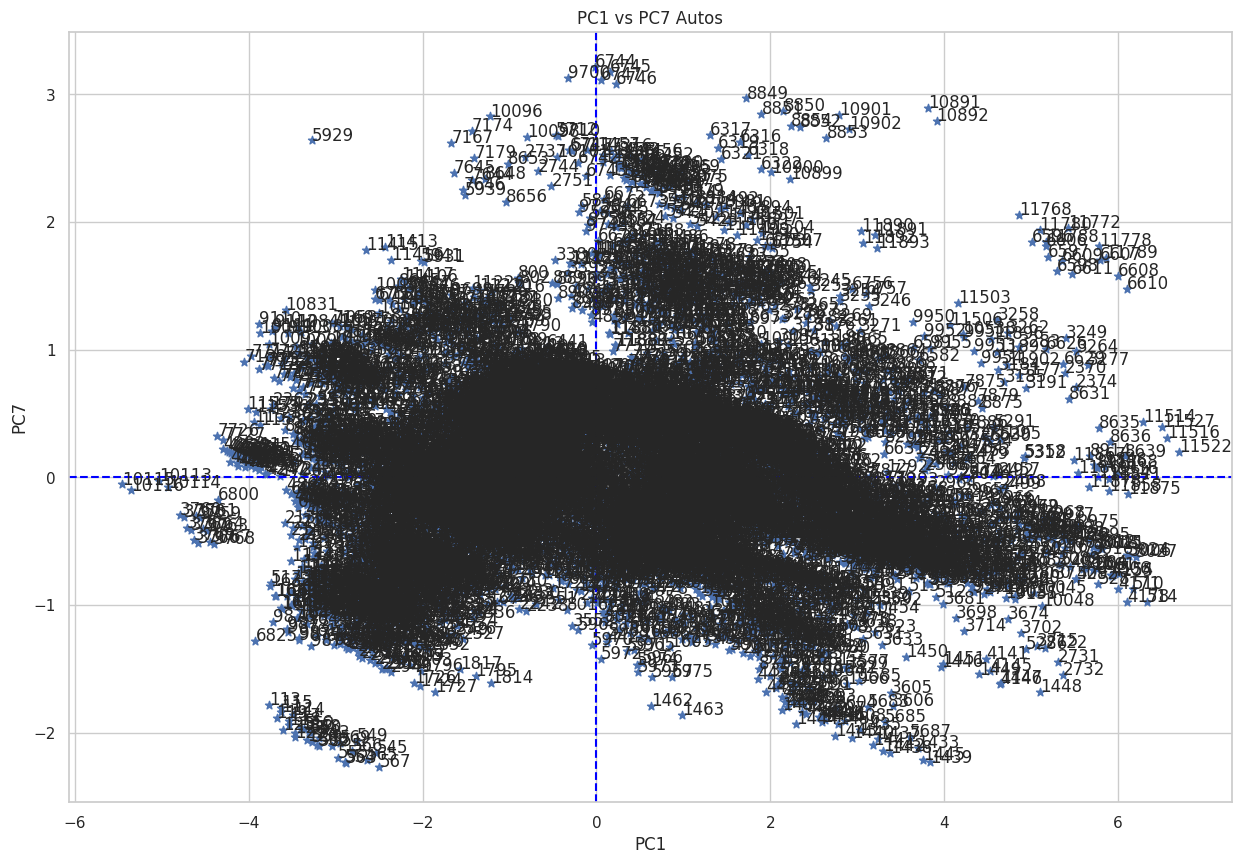

In [ ]:
# Crear un gráfico de dispersión para PC1 y PC7
plt.figure(figsize=(15,10))
plt.scatter(proyecciones['PC1'], proyecciones['PC7'], marker='*')

# Etiquetar puntos
for i, val in proyecciones.iterrows():
    plt.text(val['PC1'], val['PC7'], str(i))

# Establecer etiquetas de ejes y título
plt.xlabel('PC1')
plt.ylabel('PC7')
plt.title('PC1 vs PC7 Autos')

# Líneas de referencia
plt.axvline(x=0, color='blue', linestyle='--')
plt.axhline(y=0, color='blue', linestyle='--')

plt.show()

#  Resumen de análisis de componentes principales.


*   Los siete primeros componentes en conjunto explican aproximadamente el 96.58% de la varianza
*   Se decide conservar la información completa de los datos para mantener la máxima fidelidad en la representación de los  datos originales a costes de no  mejorar la eficiencia computacional.


.

# **Objetivo para estos datos.**



Utilizar técnicas de regresión para crear un modelo predictivo que estime el precio de un vehículo en función de sus características. Esto podría ayudar a la concesionaria a establecer precios competitivos y tomar decisiones informadas sobre la adquisición de inventario.

A continuación se utilizarán diferentes algoritmos de regresión buscando predecir el precio de los autos
y validando la precisión de los mismos.

Para ello emplearemos:
* Regresión Lineal
* Random Forest

# **Creación, entrenamiento y optimización de modelos predictivos.**

# Regresión lineal

In [ ]:
# Preparación de Datos
# Los separamos en X e y
X = df.loc[:, ['Year', 'HP', 'Cylinders', 'Popularity', 'Make_encoded', 'Model_encoded', 'MPG', 'HP_Cylinders_Ratio', 'Price_Popularity_Index', 'Price_HP_Ratio', 'Price_MPG_Ratio', 'Vehicle_Age']]
y = df['Price']



In [ ]:
# Separamos datos de test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instanciamos el Objeto LinearRegression
regressor = LinearRegression()

# Fiteamos el modelo
regressor.fit(X_train, y_train)

# Predecimos
y_pred = regressor.predict(X_test)

In [ ]:
#DF1 Real vs Predicción
df1 = pd.DataFrame({'Precio Real': y_test, 'Precio Predicción': y_pred})
df1

,Precio Real,Precio Predicción
11356,11990,10422.313751
11252,21365,19439.481559
9962,42880,42699.558054
8750,23539,22684.313507
8653,23670,25387.947686
...,...,...
10951,39500,43946.146010
1414,24470,25006.039023
5302,34500,34796.753422
5932,21050,23271.101746


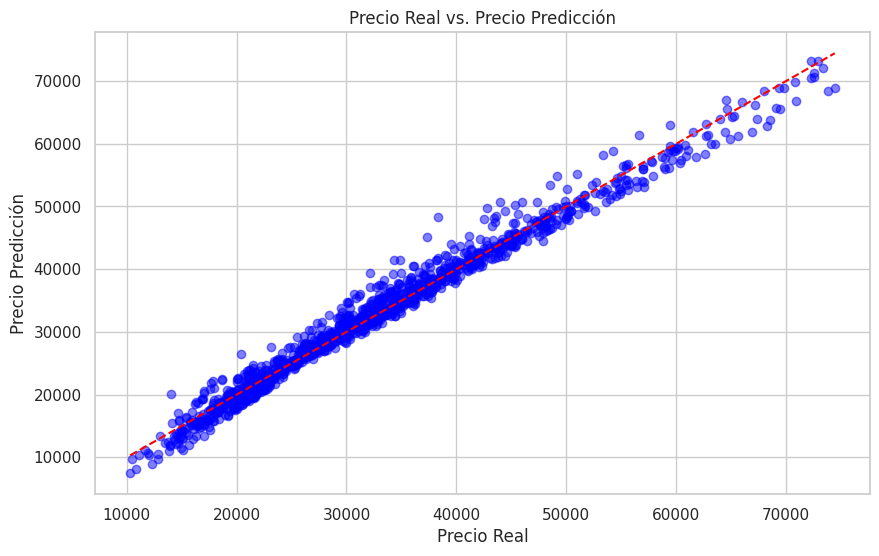

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df1['Precio Real'], df1['Precio Predicción'], alpha=0.5, color='blue')

# Agregar línea de referencia (y = x)
plt.plot([min(df1['Precio Real']), max(df1['Precio Real'])], [min(df1['Precio Real']), max(df1['Precio Real'])], color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicción')
plt.title('Precio Real vs. Precio Predicción')

plt.show()


# Mostramos la precisión del modelo

In [ ]:
print('Puntaje Testing para la Regresión lineal:', r2_score(y_test, y_pred))

Puntaje Testing para la Regresión lineal: 0.980086830624296


# Evaluación del Modelo de Regresión lineal

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1204.1948080395682
Mean Squared Error: 2902154.697721255
Root Mean Squared Error: 1703.5711601577596


## Aplicar la validación cruzada K-Fold a un modelo de regresión lineal

In [ ]:
from sklearn.model_selection import cross_val_score
# Realizar validación cruzada con K-Fold (por ejemplo, 5 folds)
scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')

# Calcular el R² promedio
mean_r2 = np.mean(scores)

print("Coeficiente de Determinación R² Promedio:", mean_r2)


Coeficiente de Determinación R² Promedio: 0.9790443598908466


# Random Forest

In [ ]:
# Separamos datos de test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Instanciamos el Objeto RandomForestRegressor
random_forest = RandomForestRegressor()

# Fiteamos el modelo
random_forest.fit(X_train, y_train)

# Predecimos
y_pred1 = random_forest.predict(X_test)

In [ ]:
# DF2 Real vs Predicción
df2 = pd.DataFrame({'Precio Real': y_test, 'Precio Predicción': y_pred1})
df2

,Precio Real,Precio Predicción
1113,48400,48587.70
4131,62160,64368.15
2001,30995,30764.11
10453,40370,38830.85
1747,30695,30608.97
...,...,...
6608,74200,73636.95
9059,25920,25716.43
10614,27970,28016.09
212,35595,35464.85


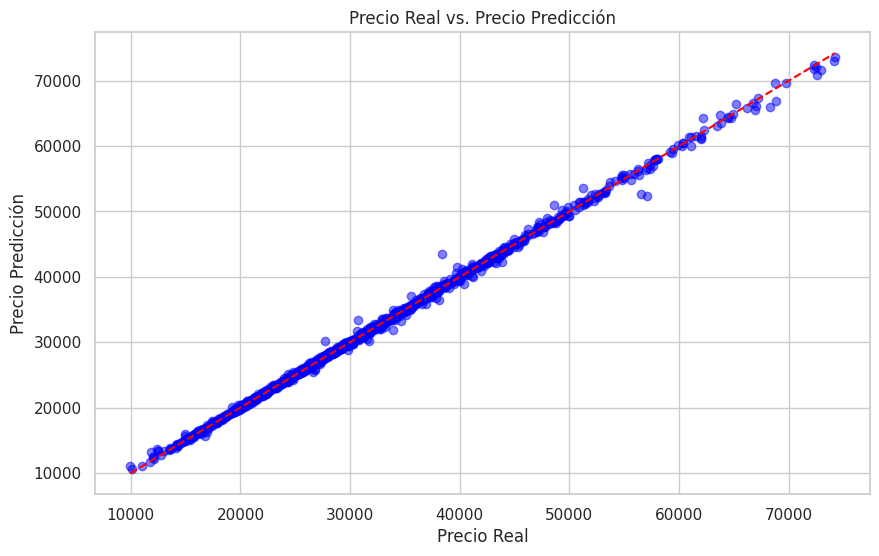

In [ ]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df2['Precio Real'], df2['Precio Predicción'], alpha=0.5, color='blue')

# Agregar línea de referencia (y = x)
plt.plot([min(df2['Precio Real']), max(df2['Precio Real'])], [min(df2['Precio Real']), max(df2['Precio Real'])], color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicción')
plt.title('Precio Real vs. Precio Predicción')

plt.show()


# Mostramos la precisión del modelo

In [ ]:
print('Puntaje Testing para Random Forest:', random_forest.score(X_test, y_test))

Puntaje Testing para Random Forest: 0.9986290925299538


# Evaluación del Modelo Random Forest

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 231.45498098859318
Mean Squared Error: 182749.83848836503
Root Mean Squared Error: 427.49250109021216


## Aplicar la validación cruzada K-Fold a un modelo de Random Forest

In [ ]:
# Realizar validación cruzada con K-Fold (por ejemplo, 5 folds)
scores_rf_r2 = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='r2')

# Calcular el coeficiente de determinación R² promedio
mean_r2_rf = np.mean(scores_rf_r2)

print("Coeficiente de Determinación R² Promedio - Random Forest:", mean_r2_rf)


Coeficiente de Determinación R² Promedio - Random Forest: 0.9986033799703424


# Optimización del modelo de Regresión Lineal, mediante GridSearchCV y RandomizedSearchCV

## GridSearchCV

In [ ]:
# Creamos la grilla de parámetros
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
        'positive': [True, False]
}
# Instanciamos el Objeto LinearRegression
lr = LinearRegression()
# Aplicamos la grilla al modelo Grid Search
grid_search_lr = GridSearchCV(estimator = lr, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)


In [ ]:
# Fiteamos el modelo con la grilla predefinida
grid_search_lr.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             verbose=2)

In [ ]:
# Vemos en pantalla el mejor score
print("Mejor Score: "+str(grid_search_lr.best_score_)+'\n')

Mejor Score: 0.9829286798402443



## RandomizedSearchCV

In [ ]:
# Creamos la grilla de parámetros para que tome valores aleatorios
parameters = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
        'positive': [True, False]
}
# Instanciamos el Objeto LinearRegression
lr = LinearRegression()
# Aplicamos la grilla al modelo Randomized Search
randm_src_lr = RandomizedSearchCV(estimator=lr, param_distributions = parameters,
                               cv = 5, n_iter = 30)

In [ ]:
# Fiteamos el modelo con la grilla predefinida
randm_src_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=30,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'positive': [True, False]})

In [ ]:
# Vemos en pantalla el mejor score
print("Mejor Score: "+str(randm_src_lr.best_score_)+'\n')

Mejor Score: 0.9829031280886851



# Optimización del modelo de Random Forest, mediante GridSearchCV y RandomizedSearchCV

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Creamos la grilla de parámetros basada en los resultados de busquedas aleatorias
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Instanciamos el Objeto RandomForestRegressor
rf = RandomForestRegressor()
# Aplicamos la grilla al modelo Grid Search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fiteamos el modelo con la grilla predefinida
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
# Vemos en pantalla el mejor score
print("Mejor Score: "+str(grid_search.best_score_)+'\n')


Mejor Score: 0.9934288678543636



## RandomizedSearchCV

In [ ]:
# Creamos la grilla de parámetros para que tome valores aleatorios
parameters = {
              'bootstrap': [True, False],
              'max_depth': sp_randInt(80, 110),
              'max_features': sp_randInt(2, 3),
              'min_samples_leaf': sp_randInt(3, 5),
              'min_samples_split': sp_randInt(8, 12),
              'n_estimators': sp_randInt(100, 1000)
             }

# Instanciamos el Objeto RandomForestRegressor
rf = RandomForestRegressor()
# Aplicamos la grilla al modelo Randomized Search
randm_src_rf = RandomizedSearchCV(estimator=rf, param_distributions = parameters,
                               cv = 5, n_iter = 30)

In [ ]:
# Fiteamos el modelo con la grilla predefinida
randm_src_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb962991120>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb962992aa0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb962990be0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb962992230>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb962993e50>})

In [ ]:
# Vemos en pantalla y el mejor score
print("Mejor Score: "+str(randm_src_rf.best_score_)+'\n')

Mejor Score: 0.9939492845752695



## Comparar el resultados de los modelos/tecnicas

In [ ]:
# Definir los resultados en un diccionario
results = {
    "Modelo/Técnica": ["Regresión Lineal", "Random Forest (Test)", "Regresión Lineal (GridSearchCV)", "Regresión Lineal (RandomizedSearchCV)", "Random Forest (GridSearchCV)", "Random Forest (RandomizedSearchCV)"],
    "Puntaje R2": [r2_score(y_test, y_pred), random_forest.score(X_test, y_test), grid_search_lr.best_score_, randm_src_lr.best_score_, grid_search.best_score_, randm_src_rf.best_score_]
}

# Crear un DataFrame a partir del diccionario
results_df = pd.DataFrame(results)

# Ordenar el DataFrame por Puntaje R2 de mayor a menor
results_df = results_df.sort_values(by="Puntaje R2", ascending=False)

# Imprimir el DataFrame ordenado
print(results_df)





                          Modelo/Técnica  Puntaje R2
1                   Random Forest (Test)    0.998629
5     Random Forest (RandomizedSearchCV)    0.993949
4           Random Forest (GridSearchCV)    0.993429
2        Regresión Lineal (GridSearchCV)    0.982929
3  Regresión Lineal (RandomizedSearchCV)    0.982903
0                       Regresión Lineal    0.978701


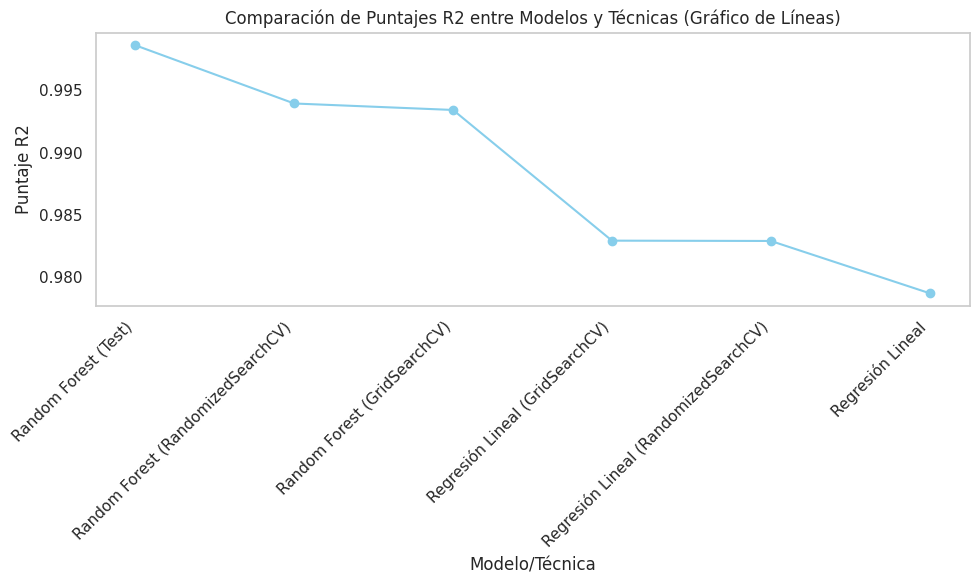

In [ ]:
# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
modelos = results_df["Modelo/Técnica"]
puntajes_r2 = results_df["Puntaje R2"]

plt.plot(modelos, puntajes_r2, marker="o", color="skyblue", linestyle="-")

plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas en el eje x para mayor legibilidad
plt.xlabel("Modelo/Técnica")
plt.ylabel("Puntaje R2")
plt.title("Comparación de Puntajes R2 entre Modelos y Técnicas (Gráfico de Líneas)")

# Mostrar el gráfico
plt.tight_layout()
plt.grid()
plt.show()


# Basándome en los resultados obtenidos, puedo afirmar lo siguiente:

**Random Forest (Test):** Este modelo obtuvo el puntaje R2 más alto entre todas las técnicas evaluadas, lo que indica que es altamente efectivo para predecir los precios de los vehículos en función de las características proporcionadas. El puntaje R2 de aproximadamente 0.999 sugiere que este modelo tiene un ajuste muy cercano a los datos reales, lo que lo convierte en una opción sólida para la predicción de precios de vehículos.

**Random Forest (RandomizedSearchCV) y Random Forest (GridSearchCV):** Ambas variantes de Random Forest con optimización de hiperparámetros también muestran un rendimiento excepcionalmente alto. Sus puntajes R2 son cercanos a 0.994 y 0.993, respectivamente. Estos modelos son altamente efectivos y competitivos en términos de precisión.

**Regresión Lineal (GridSearchCV) y Regresión Lineal (RandomizedSearchCV):** Las dos variantes de Regresión Lineal con optimización de hiperparámetros tienen puntajes R2 alrededor de 0.983, lo que indica un buen rendimiento, pero son superados por las variantes de Random Forest.

**Regresión Lineal:** La regresión lineal sin optimización de hiperparámetros es la que tiene el puntaje R2 más bajo entre todas las técnicas evaluadas, pero aún así, con un puntaje de aproximadamente 0.979, muestra un rendimiento respetable en la predicción de precios de vehículos.



---



# **Conclusion:**





Los modelos de Random Forest, ya sea con optimización de hiperparámetros o sin ella, superan en términos de precisión a la Regresión Lineal en este problema específico de predicción de precios de vehículos. Si se prioriza la precisión, cualquiera de las variantes de Random Forest es la elección preferida.

En cuanto al puntaje de **K-Fold Cross-Validation**, tanto el modelo de Regresión Lineal como el Random Forest, se acercan a 1, lo que significa que los modelos tienen una capacidad de generalización bastante buena. En otras palabras, los modelos son capaces de realizar predicciones precisas y consistentes en datos que no ha visto durante el entrenamiento. Esto indica qu no están sobreajustado a los datos de entrenamiento y son capaces de capturar patrones que se aplican a datos más amplios.






